## Exploratory Data Analysis of County-level data on U.S. opioid distributions, demographics, healthcare supply, and healthcare access

This notebook will conduct exploratory data analysis to explore which variables corrleate with the county per capita opioid pill volume. 

#### Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={'figure.figsize': [10,7]})

#### Reading Data and Defining Target

In [4]:
# read in the data
df = pd.read_csv('./data/working_data.csv')
df.shape

(26955, 142)

In [5]:
# Per Capita Pill Volume (PCPV)
# total number of opioids distributed / population estimate
target = df['pcpv']
target.describe()

count    26955.000000
mean        39.350860
std         23.398385
min          0.004364
25%         23.499339
50%         34.990636
75%         49.849938
max        238.606159
Name: pcpv, dtype: float64

#### Outliers 

It was found in early visualization of the data that several U.S. counties reported a per capita pill volume (PCPV) over 250, one of which reported this amount for 6 out of the 9 years recorded in this dataset. 

Here is an article by the Washington Post describing the scene in the county of Norton City, Virgina in 2019: [Link to Article](https://www.washingtonpost.com/national/a-remote-virginia-valley-has-been-flooded-by-prescription-opioids/2019/07/18/387bb074-a8ca-11e9-9214-246e594de5d5_story.html)

Another article in NPR describes the sentencing of a doctor out of Martinsville, Virgina (the county reporting PCPV of >250 for 5 out of the 9 years): [Link to Article](https://www.npr.org/2019/10/02/766403612/doctor-gets-40-years-for-illegally-prescribing-more-than-half-a-million-opioid-d)


In [6]:
outliers = df[df['pcpv']>250]
outliers['fips_code'].value_counts()

Series([], Name: fips_code, dtype: int64)

In [7]:
# highest pcpv for 6 consecutive years
outliers[outliers['fips_code']==51720].groupby('ord_cdr').mean()

,year,fips_code,num_nurses,num_home_health_agents,num_hospices,pop_est,vet_pop_est,num_qualify_medicare,unemploy_rate,num_docs_male,...,dentists_65plus_pc,md_pc,spec_pc,pct_25t44,pct_45t64,pct_65plus,exp_early,cancer_cdr,np_rx,pdmp_req_check
ord_cdr,,,,,,,,,,,,,,,,,,,,,


In [8]:
outliers.reset_index(drop=True)

,year,fips_code,state_abrv,county,num_nurses,num_home_health_agents,num_hospices,pop_est,vet_pop_est,num_qualify_medicare,...,md_pc,spec_pc,pct_25t44,pct_45t64,pct_65plus,exp_early,ord_cdr,cancer_cdr,np_rx,pdmp_req_check


In [9]:
# dropping all outliers with pcpv's greater than 250
df.drop(index = df[df['pcpv']>250].index, inplace=True)
df.reset_index(drop=True)
df.shape

(26955, 142)

In [10]:
df.to_csv('./data/working_data.csv', index=False)

#### Graphs

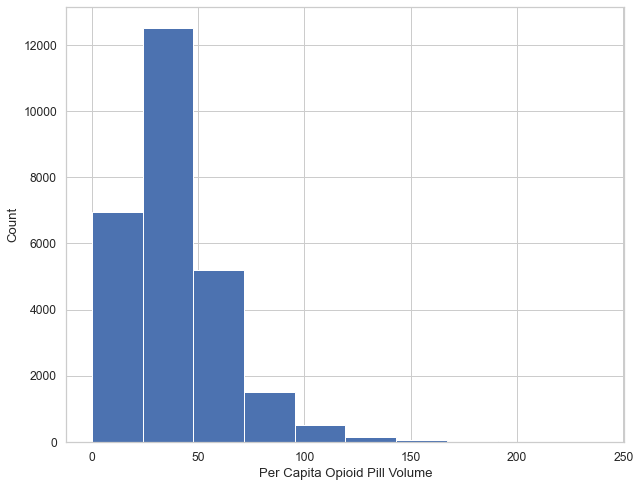

In [11]:
plt.figure(figsize=(10,8))
plt.hist(target)
plt.xlabel('Per Capita Opioid Pill Volume')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This histogram shows the distribution of per capita opioid pill volume.

In [12]:
numerical_categories = df.select_dtypes(include ='number').columns.tolist()
print(len(numerical_categories))

139


In [13]:
normal_dis_categories = ['unemploy_rate', 
                         'per_cap_medicare_cost', 
                         'med_househld_income', 
                         'prcnt_poverty', 
                         'prcnt_under65_no_insurance', 
                         'prcnt_25up_college', 
                         'prcnt_manuf_employee', 
                         'med_age', 
                         'pct_medicare', 
                         'arf_cdr', 
                         'cancer_cdr']
df[normal_dis_categories].head()

,unemploy_rate,per_cap_medicare_cost,med_househld_income,prcnt_poverty,prcnt_under65_no_insurance,prcnt_25up_college,prcnt_manuf_employee,med_age,pct_medicare,arf_cdr,cancer_cdr
0,8.8,6735.93,46164,15.2,31.7,9.6,88.5,42.1,3.815640,0.000000,32.210746
1,6.2,7962.88,58720,9.6,22.0,24.2,4.2,38.4,11.849970,0.537956,53.795577
2,5.9,4506.81,64142,9.6,28.2,9.0,77.7,40.7,2.653178,0.000000,32.214865
3,7.0,9628.99,65081,13.7,25.0,13.5,0.0,35.1,6.068402,0.287530,45.399516
4,9.7,8278.47,54054,9.9,19.6,12.4,5.7,39.1,13.795932,0.508530,63.976378


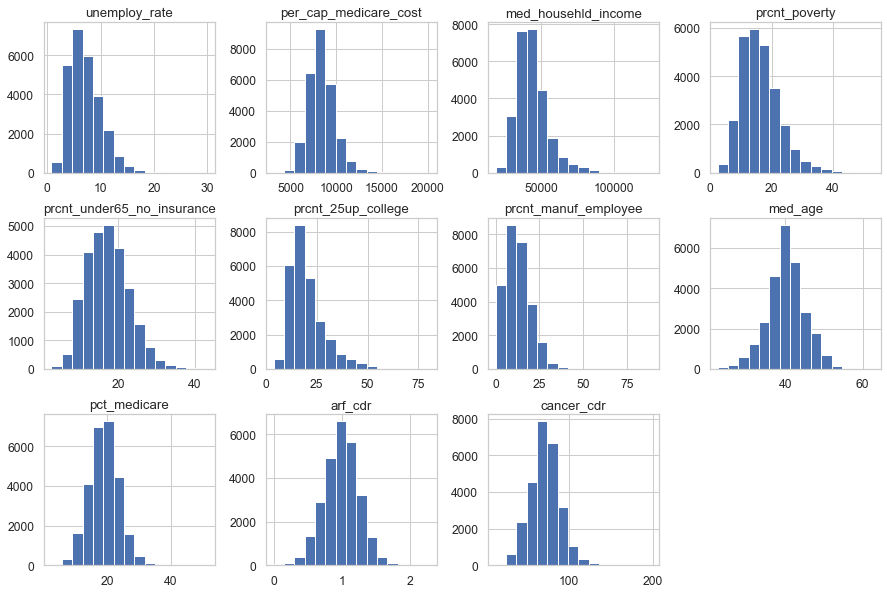

In [14]:
df[normal_dis_categories].hist(bins=15, figsize=(15, 10), layout=(3, 4));

These are all of the numerical variables whose values were normally distributed.

Text(0.5, 1.0, 'Per Capita Opioid Volume per Year')

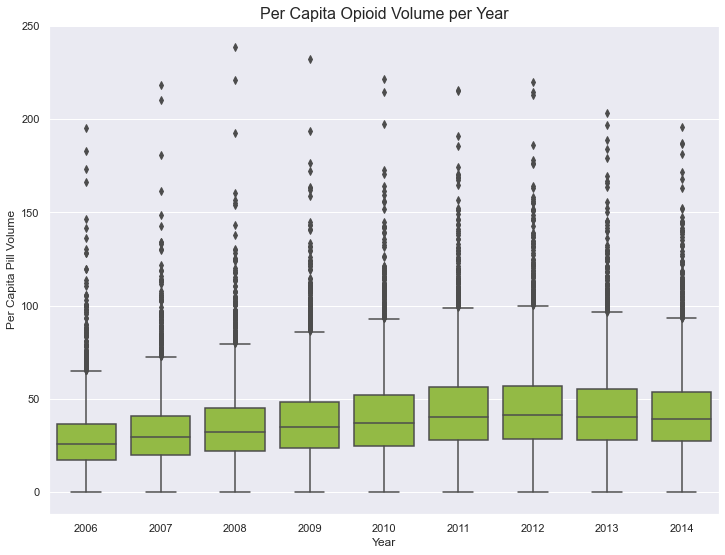

In [15]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=df['year'], y=target, color='#9ACD32').set(xlabel='Year', ylabel='Per Capita Pill Volume')
plt.title('Per Capita Opioid Volume per Year', {'fontsize': 16})

Box plots of all the reported PCPV's from each county over the course of the recorded years.

<AxesSubplot:xlabel='prcnt_poverty', ylabel='pcpv'>

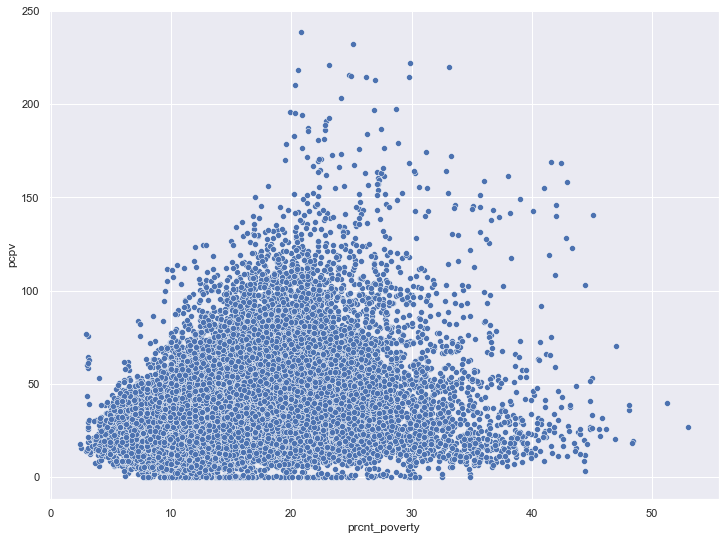

In [16]:
sns.scatterplot(x=df['prcnt_poverty'], y=target)

PCPV when correlated with the percentage the county population in poverty.

<AxesSubplot:xlabel='pct_medicare', ylabel='pcpv'>

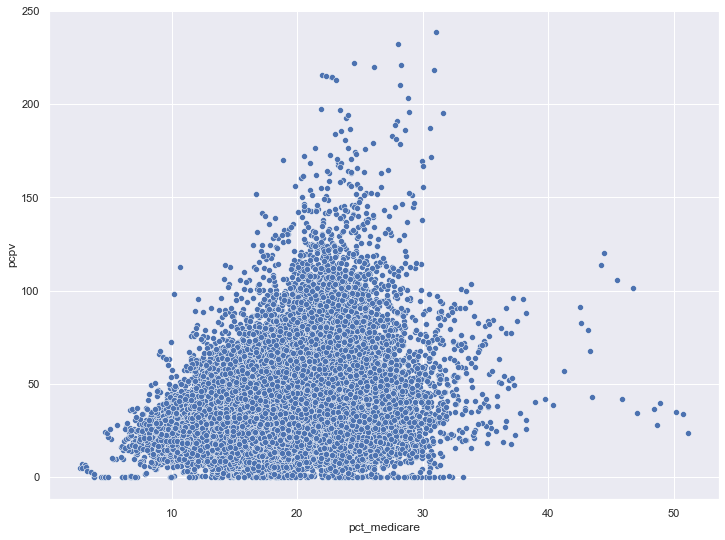

In [69]:
sns.scatterplot(x=df['pct_medicare'], y=target)

Similarly to poverty, PCPV when correlated to the median household income of a county.

<AxesSubplot:xlabel='pct_white', ylabel='pcpv'>

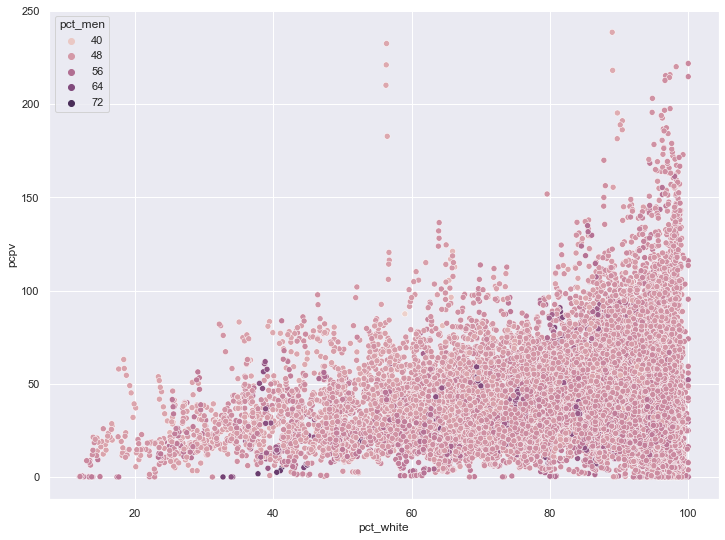

In [18]:
sns.scatterplot(x=df['pct_white'], y=target, hue=df['pct_men'])

PCPV when correlated to the percentage of white male residents in a county

<AxesSubplot:xlabel='pct_hisp', ylabel='pcpv'>

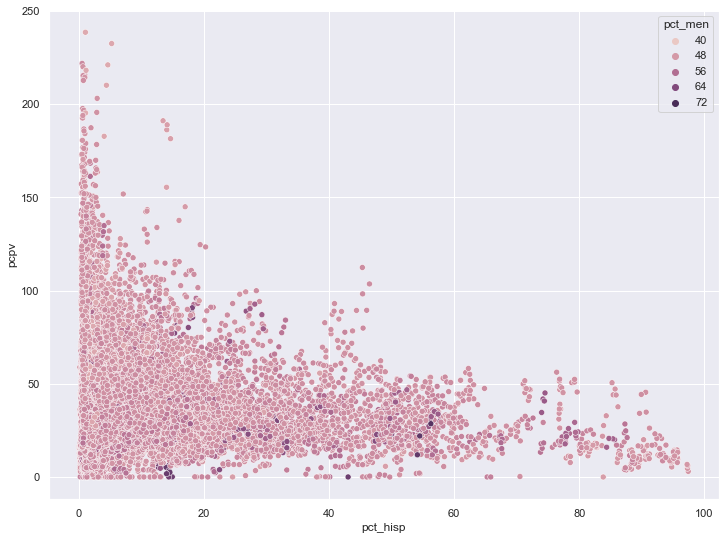

In [19]:
sns.scatterplot(x=df['pct_hisp'], y=target, hue=df['pct_men'])

Similarly, PCPV when correlated to the percentage of hispanic men in a county.

Text(0, 0.5, 'Per Capita Pill Volume')

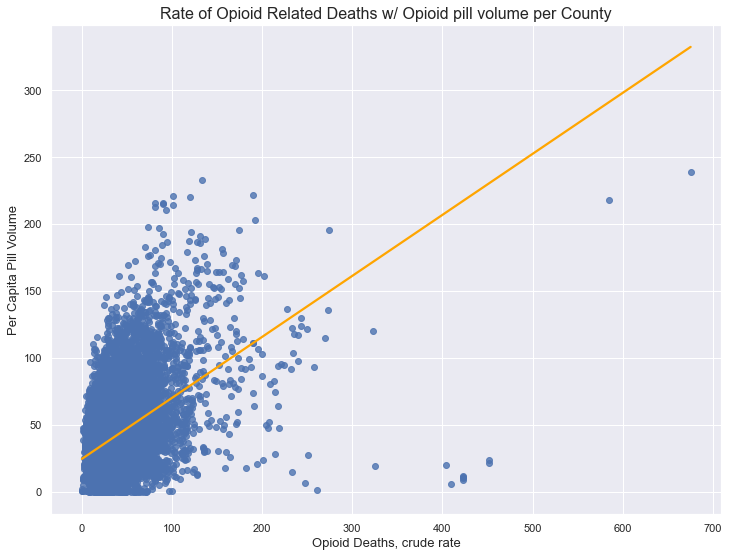

In [21]:
sns.regplot(x=df['ord_cdr'], y=df['pcpv'], line_kws= {'color':'orange'}, ci=None )
plt.title('Rate of Opioid Related Deaths w/ Opioid pill volume per County', {'fontsize': 16})
plt.xlabel('Opioid Deaths, crude rate', {'fontsize': 13})
plt.ylabel('Per Capita Pill Volume', {'fontsize': 13})

As noted by the data source, one of the purposes of the data was to aid with finding a relationship with PCPV and opioid overdoes.

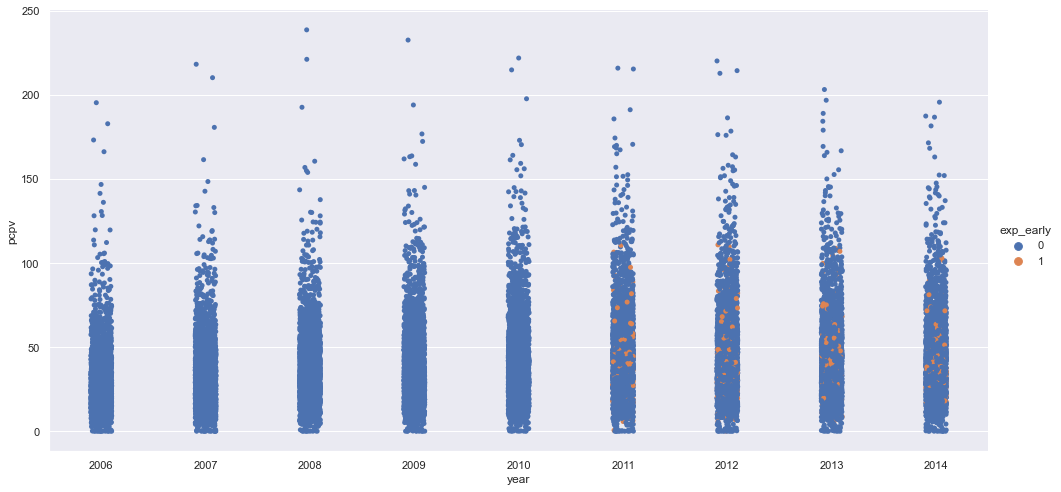

In [33]:
# 1 if county-month is located in a state after the effective date of Medicaid expansion, 0 otherwise
# sns.scatterplot(x=df['exp_early'], y=target)

sns.catplot(x='year', y='pcpv', hue='exp_early', data=df, height=7, aspect=2)


In [42]:
exp_fips = df.loc[df['exp_early'] == 1,['fips_code']]

In [47]:
fips= exp_fips["fips_code"].value_counts().index.tolist()

Text(0.5, 1.0, 'Per Capita Opioid Volume Of Early Medicaid Adoption Counties')

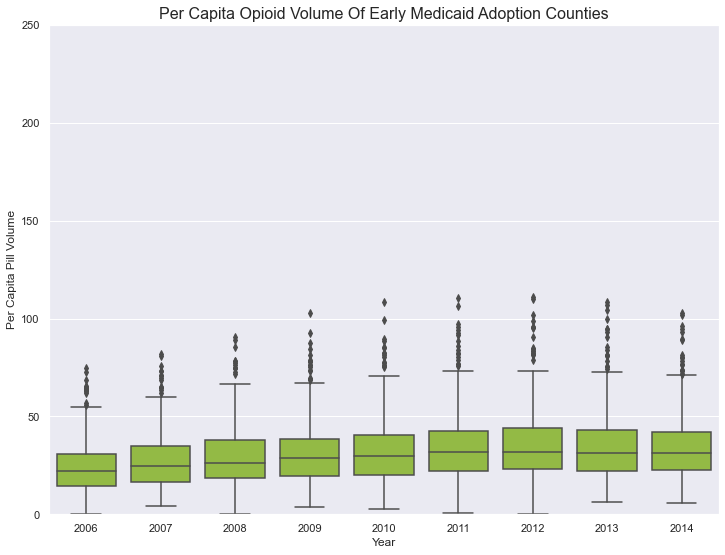

In [66]:
counties_early = df.loc[df['fips_code'].isin(fips)]

sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x='year', y='pcpv', color='#9ACD32', data=counties_early).set(xlabel='Year', ylabel='Per Capita Pill Volume')
plt.ylim([0, 250])
# plt.axhline(80, ls='--')
plt.title('Per Capita Opioid Volume Of Early Medicaid Adoption Counties', {'fontsize': 16})

Also noted by the data source, another purpose to the data was to determine if early expantions of state Medicaid increased PCPV. (This could be better shown with a line graph) 

#### Correlation Heatmap with Target

After EDA of the data and discovering that many of the LINEM assuptions can be proven true from it, the decision to move forward with a linear regression model was made. To start, an extensive look at a correlation heatmap with the target variable produced the intial variables for the model.

<AxesSubplot:title={'center':'Correlection heatmap with PCPV'}>

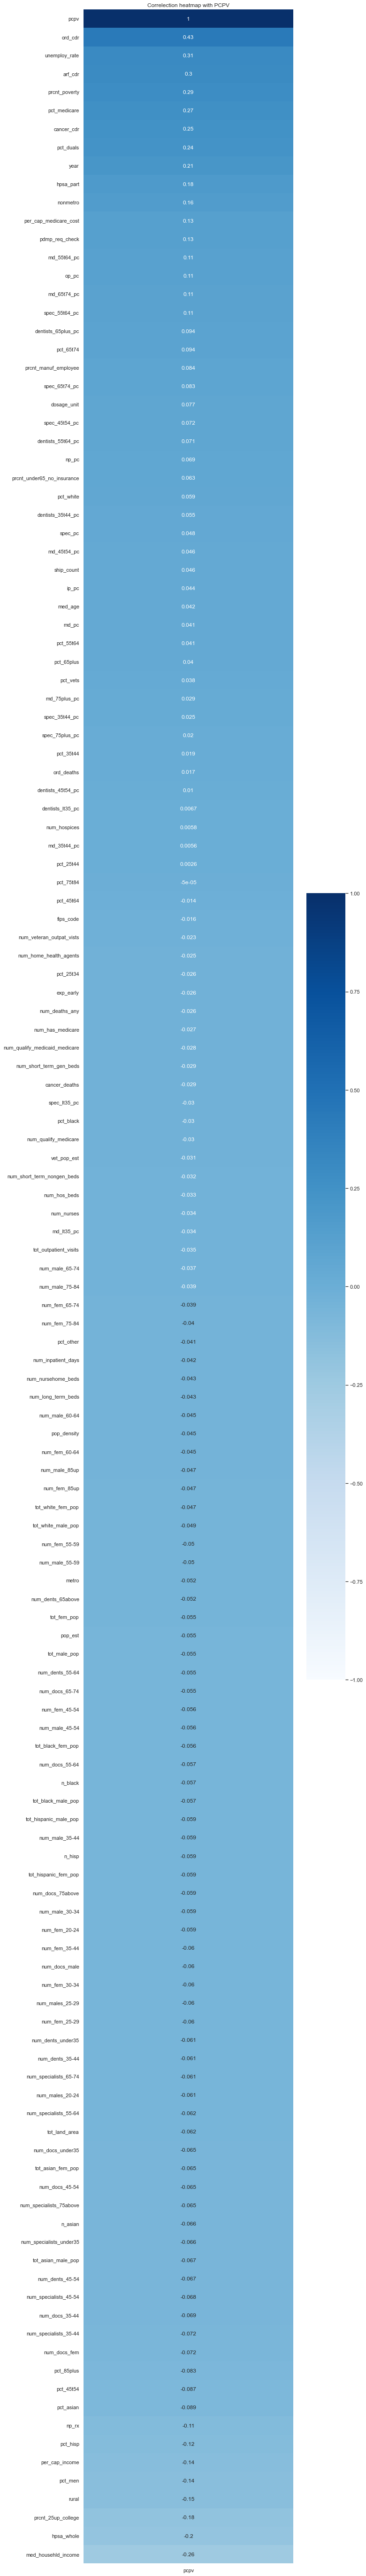

In [20]:
plt.figure(figsize=(10,100))
plt.title('Correlection heatmap with PCPV')
sns.heatmap(df.corr()[['pcpv']].sort_values(by='pcpv', ascending=False),
            vmin=-1,
            vmax=1,
            cmap='Blues',
            annot=True)